In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [2]:
data=pd.read_csv("D:/IMARTICUS WORK/Paper1/MonthWiseMarketArrivals_Clean.csv")

In [3]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [4]:
data.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [5]:
data.shape

(10227, 10)

In [6]:
data.columns=['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [10]:
data.drop('city', axis=1)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,January-2012
...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,December-2014


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'quantity'}>],
       [<AxesSubplot:title={'center':'priceMin'}>,
        <AxesSubplot:title={'center':'priceMax'}>],
       [<AxesSubplot:title={'center':'priceMod'}>, <AxesSubplot:>]],
      dtype=object)

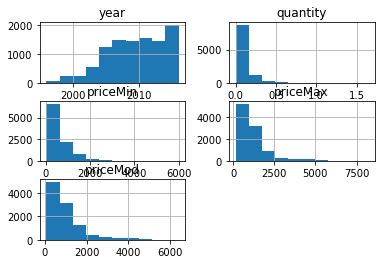

In [12]:
data.hist()

In [13]:
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [14]:
data.value_counts()

market      month      year  quantity  priceMin  priceMax  priceMod  state  city    date          
ABOHAR(PB)  April      2006  2100      326       400       366       PB     ABOHAR  April-2006        1
NAGPUR      December   2005  12921     571       650       610       MS     NAGPUR  December-2005     1
            August     2009  87228     527       796       661       MS     NAGPUR  August-2009       1
                       2010  63489     668       968       808       MS     NAGPUR  August-2010       1
                       2011  23065     1080      1318      1200      MS     NAGPUR  August-2011       1
                                                                                                     ..
HUBLI(KNT)  March      2004  17050     207       518       425       KNT    HUBLI   March-2004        1
                       2005  17100     143       351       293       KNT    HUBLI   March-2005        1
                       2006  20300     120       346       294       

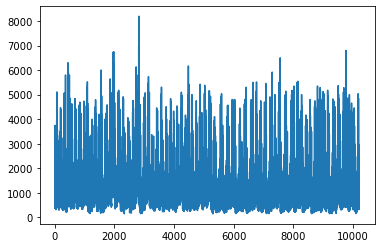

In [143]:
plt.plot(data.index)

<AxesSubplot:>

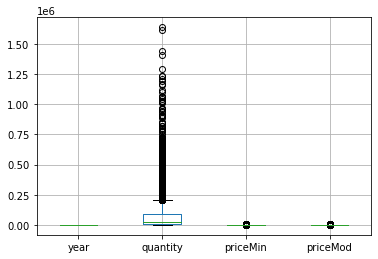

In [139]:
data.boxplot()


In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
from sklearn.model_selection import train_test_split
train=data.iloc[:132]
test=data.iloc[132:]

In [41]:
trainlast=train.tail(1)

In [42]:
print(trainlast)

       market  month  year  quantity  priceMin  priceMax  priceMod state  \
131  AGRA(UP)  April  2012     67000       615       688       650    UP   

     city        date  
131  AGRA  April-2012  


In [44]:
test["navie"]

132      405
133      405
134      405
135      405
136      405
        ... 
10222    405
10223    405
10224    405
10225    405
10226    405
Name: navie, Length: 10095, dtype: int64

In [46]:
train["navie"]=405

C:\Users\DELLCO~1\AppData\Local\Temp/ipykernel_9628/2144616432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["navie"]=405


In [133]:
from sklearn.metrics import mean_squared_error
rmse1=mean_squared_error(test.priceMax,test.navie,squared=False)
rmse2=mean_squared_error(test.priceMax,test.navie,squared=False)
print(rmse1,rmse2)

1270.5865218316023 1270.5865218316023


In [134]:
shift=data.shift(1)

In [135]:
x=data.iloc[:,2:3].values
y=data.iloc[:,3:4].values

In [78]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score 



In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=0)

In [86]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [88]:
#predict the test result
y_pred=regressor.predict(x_test)


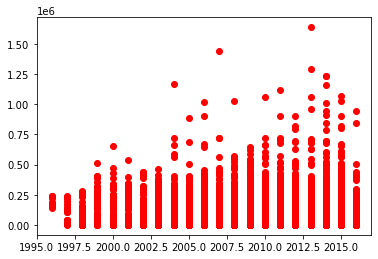

In [132]:
plt.scatter(x_train,y_train,c='red')
plt.show()

Text(0, 0.5, 'priceMax')

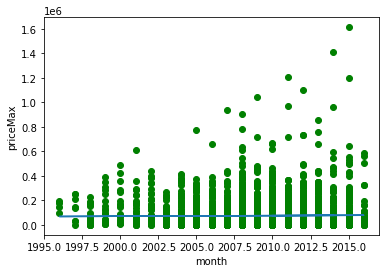

In [131]:
plt.plot(x_test,y_pred)   
plt.scatter(x_test,y_test,c='green')
plt.xlabel('month')
plt.ylabel('priceMax')

In [94]:
import numpy as np

In [95]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 131322.08885144847


In [98]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [129]:
data = pd.read_csv('D:/IMARTICUS WORK/Paper1/MonthWiseMarketArrivals_Clean.csv',index_col='priceMax', parse_dates=True)

<AxesSubplot:xlabel='date'>

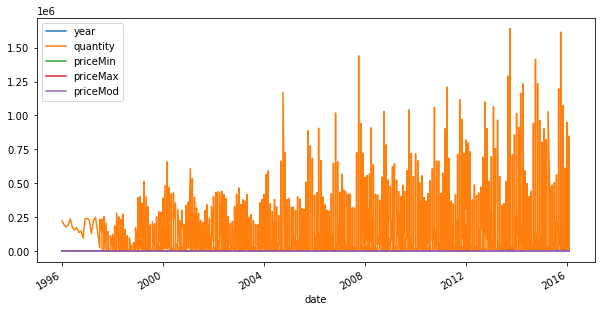

In [104]:
data.plot(figsize=(10,5))

In [128]:
# calculate acf
acf_values = acf(data['priceMax'])

C:\Anconda\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Anconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


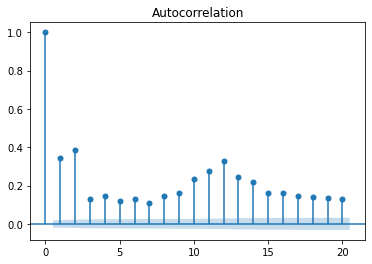

In [127]:
# keeping lag as 30
plot_acf(data['priceMax'], lags=20);

In [126]:
# PACF
pacf_values = (data['priceMax'])

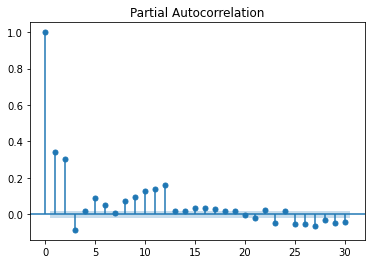

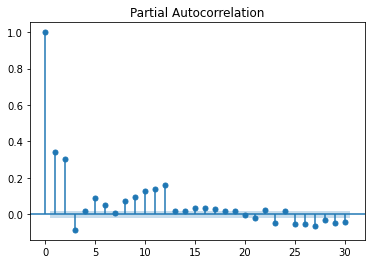

In [124]:
# plot pacf
plot_pacf(data['priceMax'], lags=30)

In [144]:
import pandas as pd

In [145]:
#plotting data - matplotlib
from matplotlib import pyplot as plt

In [146]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [148]:
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

In [149]:
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [166]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_train,y_train)


C:\Users\DELLCO~1\AppData\Local\Temp/ipykernel_9628/3516104820.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [168]:
regressor.score(x_train,y_train)

0.008573950816170628

In [170]:
regressor.score(x_test,y_test)

0.0021358050244607574

In [171]:
from sklearn.ensemble import GradientBoostingRegressor
regres = GradientBoostingRegressor(n_estimators=100,random_state=0)
regres.fit(x_train,y_train)




C:\Anconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(random_state=0)

In [172]:
regres.score(x_train,y_train)


0.008814486245485309

In [173]:
regres.score(x_test,y_test)

0.0027111108457178457

In [174]:
from sklearn.ensemble import AdaBoostRegressor
regr= AdaBoostRegressor(n_estimators=100, random_state=0)
regr.fit(x_train,y_train)

C:\Anconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(n_estimators=100, random_state=0)

In [175]:
from sklearn.decomposition import PCA
model=PCA()

In [176]:
pca=PCA()
pca.fit(x_train)

PCA()

In [178]:
ratio=pca.explained_variance_ratio_

In [180]:
ratio.shape

(1,)

In [167]:
data = pd.read_csv('D:/IMARTICUS WORK/Paper1/MonthWiseMarketArrivals_Clean.csv')

In [183]:
data.index.freq = 'MS'

In [185]:
m=12
alpha = 1/(2*m)

C:\Anconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


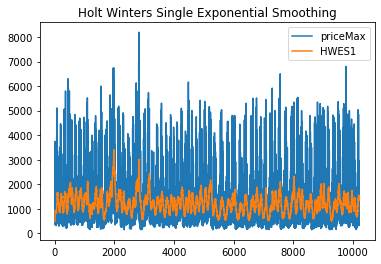

In [189]:
data['HWES1'] = SimpleExpSmoothing(data['priceMax']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
data[['priceMax','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');